<a href="https://colab.research.google.com/github/NeetaTaneja/GL/blob/master/R8_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Botanical research

* University’s management require an automation which can create a classifier capable of determining a plant's species from a photo
* train and compare image classifier models using supervised learning
classifier, neural network classifier and a CNN classifier

##  The dataset comprises of images from 12 plant species


Import the data. Analyse the dimensions of the data. Visualise the data

In [53]:
%tensorflow_version 2.x
import tensorflow

In [54]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [55]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [56]:
project_path = "/content/gdrive/MyDrive/CNN/Project1"
train_file = "Dataset - Plant-seedlings-classification.zip"
test_file = "Dataset - Images.zip"
predictions_file = "Dataset - Prediction.zip"

In [58]:
from zipfile import ZipFile
with ZipFile(project_path + "/" + train_file,'r') as z:
  z.extractall()

In [59]:
from zipfile import ZipFile
with ZipFile(project_path + "/" + test_file,'r') as z:
  z.extractall()

In [60]:
from zipfile import ZipFile
with ZipFile(project_path + "/" + predictions_file,'r') as z:
  z.extractall()

In [61]:
X = []
y = []

In [62]:
#project_path = "/content"

In [63]:
import os
os.chdir(project_path)

In [64]:
os.listdir()

['R8-Project1.ipynb',
 'Dataset - Images.zip',
 'Dataset - Prediction.zip',
 'Dataset - Plant-seedlings-classification.zip',
 'Images',
 'Prediction',
 '__MACOSX',
 'sample_submission.csv',
 'test',
 'train']

In [65]:
os.chdir(project_path + '/train')

In [66]:
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [67]:
import cv2

#### Import the train data, resize it to 128*128, store it in x_train,y_train

In [68]:
for i in os.listdir():
  #print(i)
  for j in os.listdir(i):
    file_name = project_path + "/train" + "/" + i + "/" + j
    #print(file_name)
    temp = cv2.imread(file_name)
    temp = cv2.resize(temp, (128,128))
    X.append(temp)
    y.append(i)

#### Import the test data, resize it to 128*128, store it in x_test,y_test

In [69]:
os.chdir(project_path + '/test')
x_predict = []

In [70]:
os.listdir()

['0021e90e4.png',
 '003d61042.png',
 '007b3da8b.png',
 '0086a6340.png',
 '00c47e980.png',
 '00d090cde.png',
 '00ef713a8.png',
 '01291174f.png',
 '026716f9b.png',
 '02cfeb38d.png',
 '03566743d.png',
 '03a2ee656.png',
 '03e322a29.png',
 '03ef36742.png',
 '043449b0b.png',
 '0437393b1.png',
 '04814f36d.png',
 '05341a8a6.png',
 '060450d79.png',
 '060f1dc84.png',
 '0625f063b.png',
 '063363305.png',
 '06d12f6fa.png',
 '071cb3ece.png',
 '0751c0bbc.png',
 '07e62f903.png',
 '085974290.png',
 '0885e7690.png',
 '089ad62a7.png',
 '08d591441.png',
 '0911d3dee.png',
 '099b961ec.png',
 '0a64e3e6c.png',
 '0ad9e7dfb.png',
 '0ae6668fa.png',
 '0bf7bfb05.png',
 '0c27cf05f.png',
 '0c4199daa.png',
 '0c45ace27.png',
 '0c51bf229.png',
 '0c5f6c493.png',
 '0caeda5df.png',
 '0d117d910.png',
 '0d31e6602.png',
 '0dba99002.png',
 '0e8492cb1.png',
 '0ebf8f2f4.png',
 '0ee4ad224.png',
 '0f6cbe5e8.png',
 '0fb233ad6.png',
 '115f93ecc.png',
 '116b136de.png',
 '1191ba346.png',
 '11d3f68ff.png',
 '122913909.png',
 '12625488

In [72]:
for i in os.listdir():
  #print(i)
  file_name = project_path + "/test" + "/" + i
  #print(file_name)
  temp = cv2.imread(file_name)
  temp = cv2.resize(temp, (128,128))
  x_predict.append(temp)

In [89]:
print("Number of images in X = ",len(X))
print("Shape of each image in X ", X[0].shape)

Number of images in X =  4750
Shape of each image in X  (128, 128, 3)


#### Visualize a few elements and their labels

Label: Black-grass


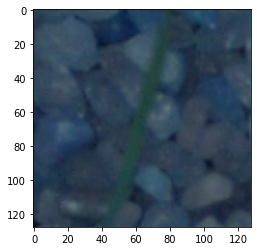

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y[100]))
plt.imshow(X[100], cmap='gray')

Label: Common Chickweed


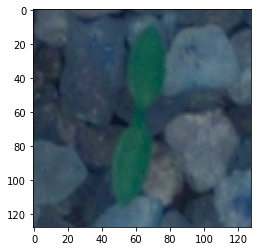

In [94]:
print("Label: {}".format(y[1000]))
plt.imshow(X[1000], cmap='gray')

Label: Small-flowered Cranesbill


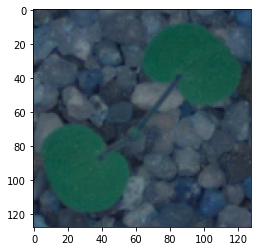

In [96]:
print("Label: {}".format(y[4000]))
plt.imshow(X[4000], cmap='gray')

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


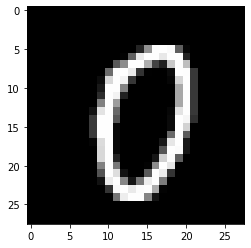

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [ ]:
X_train
x= y_train < 5
print(X_train.shape)
print(y_train.shape)
print(x.shape)
x

(60000, 28, 28)
(60000,)
(60000,)


array([False,  True,  True, ..., False, False, False])

In [ ]:
##Data from 0 to 4
X_train_04 = X_train[y_train < 5]
y_train_04 = y_train[y_train < 5]
X_test_04 = X_test[y_test < 5]
y_test_04 = y_test[y_test < 5]

#Data from 5 to 9
X_train_59 = X_train[y_train >= 5]
y_train_59 = y_train[y_train >= 5]
X_test_59 = X_test[y_test >= 5]
y_test_59 = y_test[y_test >= 5]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [ ]:
print ("Size of X_train_04 = ",X_train_04.shape)
print ("Size of y_train_04 = ",y_train_04.shape)
print ("Size of X_test_04 = ",X_test_04.shape)
print ("Size of y_test_04 = ",y_test_04.shape)

Size of X_train_04 =  (30596, 28, 28)
Size of y_train_04 =  (30596,)
Size of X_test_04 =  (5139, 28, 28)
Size of y_test_04 =  (5139,)


*   30596 records are present in training set with labels 0-4
*   5139 records are present in test set with labels 0-4



In [ ]:
print ("Size of X_train_59 = ",X_train_59.shape)
print ("Size of y_train_59 = ",y_train_59.shape)
print ("Size of X_test_59 = ",X_test_59.shape)
print ("Size of y_test_59 = ",y_test_59.shape)

Size of X_train_59 =  (29404, 28, 28)
Size of y_train_59 =  (29404,)
Size of X_test_59 =  (4861, 28, 28)
Size of y_test_59 =  (4861,)




*   29404 records are present in training set with labels 5-9
*   4861 records are present in test set with labels 5-9



In [ ]:
import numpy as np
print(np.unique(y_train_04))
print(np.unique(y_train_59))

[0 1 2 3 4]
[5 6 7 8 9]


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [ ]:
X_train_04=X_train_04.reshape(X_train_04.shape[0],28,28,1)
X_test_04=X_test_04.reshape(X_test_04.shape[0],28,28,1)

print(X_train_04.shape)
print(X_test_04.shape)

(30596, 28, 28, 1)
(5139, 28, 28, 1)


## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [ ]:
X_train_04 = X_train_04.astype('float32')
X_test_04 = X_test_04.astype('float32')
X_train_04/=255
X_test_04/=255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [ ]:
print("Shape of X_train_04 = ",X_train_04.shape)
print("Shape of X_test_04 = ",X_test_04.shape)
print("Number of images in X_train_04 = ",X_train_04.shape[0])
print("Number of images in X_test_04 = ",X_test_04.shape[0])

Shape of X_train_04 =  (30596, 28, 28, 1)
Shape of X_test_04 =  (5139, 28, 28, 1)
Number of images in X_train_04 =  30596
Number of images in X_test_04 =  5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [ ]:
num_classes = 5
y_train_04=tensorflow.keras.utils.to_categorical(y_train_04,num_classes)
y_test_04=tensorflow.keras.utils.to_categorical(y_test_04,num_classes)

y_train_04

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

## Question 6
We will build our model by using Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [ ]:
input_shape = (28,28,1)
num_classes = 5

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [ ]:
model.add(Flatten())

model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_04,y_train_04,validation_data=(X_train_04,y_train_04),epochs=10,batch_size=128)

Epoch 1/10
240/240 [==============================] - 5s 11ms/step - loss: 1.0054 - accuracy: 0.7040 - val_loss: 0.1383 - val_accuracy: 0.9585
Epoch 2/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1379 - accuracy: 0.9578 - val_loss: 0.1275 - val_accuracy: 0.9600
Epoch 3/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1228 - accuracy: 0.9629 - val_loss: 0.0999 - val_accuracy: 0.9683
Epoch 4/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1049 - accuracy: 0.9665 - val_loss: 0.0892 - val_accuracy: 0.9722
Epoch 5/10
240/240 [==============================] - 2s 9ms/step - loss: 0.0986 - accuracy: 0.9685 - val_loss: 0.1363 - val_accuracy: 0.9570
Epoch 6/10
240/240 [==============================] - 2s 9ms/step - loss: 0.0916 - accuracy: 0.9713 - val_loss: 2.7705 - val_accuracy: 0.4170
Epoch 7/10
240/240 [==============================] - 2s 9ms/step - loss: 0.1723 - accuracy: 0.9569 - val_loss: 0.0675 - val_accuracy: 0.9789
Epoch

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [ ]:
score = model.evaluate(X_test_04, y_test_04, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0404113307595253
Test accuracy: 0.9885191917419434


In [ ]:
y_predict = model.predict(X_test_04)

In [ ]:
np.argmax(y_predict[0])

2

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [ ]:
for layer in model.layers[:]:
    if ("dense" not in layer.name):
      print("Setting layer %s to not trainable"%layer.name)
      layer.trainable =  False

Setting layer conv2d to not trainable
Setting layer conv2d_1 to not trainable
Setting layer max_pooling2d to not trainable
Setting layer dropout to not trainable
Setting layer flatten to not trainable


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [ ]:
y_train_59 = y_train_59 - 5
y_test_59 = y_test_59 - 5

np.unique(y_train_59)

array([0, 1, 2, 3, 4], dtype=uint8)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [ ]:
X_train_59=X_train_59.reshape(X_train_59.shape[0],28,28,1)
X_test_59=X_test_59.reshape(X_test_59.shape[0],28,28,1)

print(X_train_59.shape)
print(X_test_59.shape)

(29404, 28, 28, 1)
(4861, 28, 28, 1)


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [ ]:
X_train_59 = X_train_59.astype('float32')
X_test_59 = X_test_59.astype('float32')
X_train_59/=255
X_test_59/=255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [ ]:
print("Shape of X_train_59 = ",X_train_59.shape)
print("Shape of X_test_59 = ",X_test_59.shape)
print("Number of images in X_train_59 = ",X_train_59.shape[0])
print("Number of images in X_test_59 = ",X_test_59.shape[0])

Shape of X_train_59 =  (29404, 28, 28, 1)
Shape of X_test_59 =  (4861, 28, 28, 1)
Number of images in X_train_59 =  29404
Number of images in X_test_59 =  4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use tensorflow.keras.utils.to_categorical

In [ ]:
num_classes = 5
y_train_59=tensorflow.keras.utils.to_categorical(y_train_59,num_classes)
y_test_59=tensorflow.keras.utils.to_categorical(y_test_59,num_classes)

y_train_59

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [ ]:
history = model.fit(x = X_train_59, y = y_train_59, validation_data=(X_train_59,y_train_59),epochs=10,batch_size=128)

Epoch 1/10
230/230 [==============================] - 2s 9ms/step - loss: 0.3800 - accuracy: 0.8798 - val_loss: 0.1828 - val_accuracy: 0.9400
Epoch 2/10
230/230 [==============================] - 2s 9ms/step - loss: 0.1816 - accuracy: 0.9420 - val_loss: 0.1389 - val_accuracy: 0.9536
Epoch 3/10
230/230 [==============================] - 2s 9ms/step - loss: 0.1497 - accuracy: 0.9512 - val_loss: 0.1146 - val_accuracy: 0.9635
Epoch 4/10
230/230 [==============================] - 2s 9ms/step - loss: 0.1289 - accuracy: 0.9575 - val_loss: 0.1080 - val_accuracy: 0.9666
Epoch 5/10
230/230 [==============================] - 2s 9ms/step - loss: 0.1159 - accuracy: 0.9632 - val_loss: 0.0887 - val_accuracy: 0.9709
Epoch 6/10
230/230 [==============================] - 2s 9ms/step - loss: 0.1036 - accuracy: 0.9670 - val_loss: 0.0886 - val_accuracy: 0.9714
Epoch 7/10
230/230 [==============================] - 2s 9ms/step - loss: 0.0972 - accuracy: 0.9686 - val_loss: 0.0733 - val_accuracy: 0.9769
Epoch 

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [ ]:
score = model.evaluate(X_test_59, y_test_59, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07241731882095337
Test accuracy: 0.9746965765953064


In [ ]:
y_predict = model.predict(X_test_59)
np.argmax(y_predict[0])

2

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('./gdrive/MyDrive/CNN/LabML-R8/Internal/tweets.csv',encoding = 'unicode_escape')

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Drop null values
- drop all the rows with null values

In [ ]:
df.shape

(9093, 3)

In [ ]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.shape

(3291, 3)

In [ ]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [ ]:
import re
df['tweet_text'] = df['tweet_text'].map(lambda s: s.lower())
df['tweet_text'] = df['tweet_text'].map(lambda s: re.sub('[^0-9a-z #+_]','',s))

In [ ]:
df['tweet_text'] = df['tweet_text'].map(lambda s:s.strip())

print dataframe

In [ ]:
df['tweet_text'].head()

0    wesley83 i have a 3g iphone after 3 hrs tweeti...
1    jessedee know about fludapp  awesome ipadiphon...
2    swonderlin can not wait for #ipad 2 also they ...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri #sxsw marissa may...
Name: tweet_text, dtype: object

In [ ]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iPhone,Negative emotion
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,Positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,iPad,Positive emotion
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,Google,Positive emotion


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [ ]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [ ]:
df_new = df[df["is_there_an_emotion_directed_at_a_brand_or_product"].isin(['Positive emotion','Negative emotion'])]

In [ ]:
df_new.shape

(3191, 3)

In [ ]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [ ]:
df_new['is_there_an_emotion_directed_at_a_brand_or_product'] = df_new['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion':1,'Negative emotion':0})

In [ ]:
df_new['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

1    2672
0     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [ ]:
X = df_new['tweet_text']
y = df_new['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,random_state=10)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2393,) (798,)
(2393,) (798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(ngram_range= (1,2), stop_words='english',min_df=2)

In [ ]:
X_train = cvect.fit_transform(X_train)
X_test = cvect.transform(X_test)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [ ]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [ ]:
lr_pred = lr.predict(X_test)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [ ]:
nb_pred = nb.predict(X_test)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression Test Accuracy")
print(accuracy_score(y_test, lr_pred))
print("*" * 50)
print(classification_report(y_test,lr_pred))

Logistic Regression Test Accuracy
0.8659147869674185
**************************************************
              precision    recall  f1-score   support

           0       0.76      0.33      0.46       138
           1       0.87      0.98      0.92       660

    accuracy                           0.87       798
   macro avg       0.82      0.65      0.69       798
weighted avg       0.85      0.87      0.84       798



### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Naive Bayes Test Accuracy")
print(accuracy_score(y_test, nb_pred))
print("*" * 50)
print(classification_report(y_test,nb_pred))

Naive Bayes Test Accuracy
0.8571428571428571
**************************************************
              precision    recall  f1-score   support

           0       0.68      0.33      0.45       138
           1       0.87      0.97      0.92       660

    accuracy                           0.86       798
   macro avg       0.78      0.65      0.68       798
weighted avg       0.84      0.86      0.84       798

